In [1]:
import numpy as np
import matplotlib.pyplot as plt
import io
import bson
from skimage.data import imread

%matplotlib inline

import pandas as pd

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable



In [2]:
path = "/home/edwin/Datasets/cdiscounts/"
train_path = path +  "train_example.bson"

In [10]:
class CDiscountDataset(Dataset):
    def __init__(self):
        file_read = open(train_path, 'rb').read()
        docs = bson.decode_all(file_read)
        self.c_discount_frame = pd.DataFrame.from_dict(docs)
    
    def __len__(self):
        return len(self.c_discount_frame)
    
    def __getitem__(self, idx):
        # todo: There is more than one image, should make it consider that         
        image = c_discount_dataset.dataframe().loc[idx].imgs[0]['picture']
        image = imread(io.BytesIO(image))
        category_id = c_discount_dataset.dataframe().loc[0].category_id
        sample = {'image': image, 'label': category_id }
        return sample
    
    def dataframe(self):
        return self.c_discount_frame

In [11]:
c_discount_dataset = CDiscountDataset()


In [12]:
c_discount_dataset

In [6]:
len(c_discount_dataset)

82

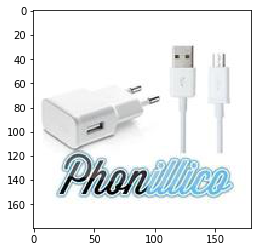

In [53]:
plt.imshow(c_discount_dataset[25]['image'])

In [20]:
size_of_image = c_discount_dataset[25]['image'].shape
size_of_image

(180, 180, 3)

In [15]:
# create a trainloader
train_loader = DataLoader(c_discount_dataset, batch_size=4, shuffle=True, num_workers=4)

In [16]:
train_loader

In [18]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_dim, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        return out

In [37]:
input_dim = 180*180*3
hidden_dim = 100
# num_classes => total number of potential outputs, categories
output_dim = 36

model = FeedForwardNN(input_dim, hidden_dim, output_dim)

if torch.cuda.is_available():
    model.cuda()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [38]:
print(model.parameters())

<generator object Module.parameters at 0x7fba2bf924c0>


In [28]:
# Hidden Layer Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

# FC 2 Parameters
print(list(model.parameters())[2].size())

# FC 2 Bias Parameters
print(list(model.parameters())[3].size())

torch.Size([100, 32400])
torch.Size([100])
torch.Size([36, 100])
torch.Size([36])


In [30]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(c_discount_dataset) / batch_size)
num_epochs = int(num_epochs)



In [31]:
num_epochs

3658

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, row, in enumerate(train_loader):
        images = Variable(row['image'].view(-1,180*180*3).cuda())
        labels = Variable(row['label'].cuda())

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        iter += 1
        if iter % 500 == 0:
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0]))

In [ ]:
print("Test")